In [1]:
import numpy as np
import tensorflow as tf
from keras.layers import Flatten,Activation,Input,Add,Dense,Conv2D,ZeroPadding2D, \
    MaxPooling2D,AveragePooling2D,ZeroPadding2D,BatchNormalization
from keras.models import Model, load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from Resnet50 import ResNet50
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam, SGD


In [2]:
train_data_dir = 'train/'
test_data_dir = 'test/'
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [3]:
train_datagen = image.ImageDataGenerator(
    rescale= 1 / 255.0,
    shear_range= 0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip= True,
    fill_mode= 'nearest',
    width_shift_range= 5,
    height_shift_range= 5,
    vertical_flip= True
)
test_datagen = image.ImageDataGenerator(rescale=1/255.0)

In [4]:
train_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    color_mode= 'grayscale',
    target_size= (48, 48),
    batch_size= 32,
    class_mode= 'categorical',
    shuffle= True
)

test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


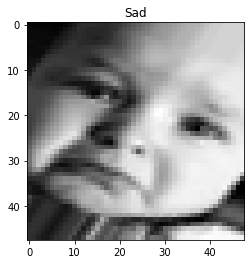

(32, 48, 48, 1)


In [5]:
img, label = train_generator.next()
image = img[0]
labl = labels[label[0].argmax()]
plt.imshow(image, cmap='gray')
plt.title(labl)
plt.show()
print(img.shape)

In [6]:
model = ResNet50(input_shape=(48,48,1))
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 50, 50, 1)   0           ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 23, 23, 32)   832         ['zero_padding2d[0][0]']         
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 23, 23, 32)   128         ['conv1[0][0]']                  
                                                                                           

In [9]:
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer._decayed_lr(tf.float32) # I use ._decayed_lr method instead of .lr
    return lr

In [10]:
schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.001, 898 * 5, 0.8, staircase=False, name=None
)
optimizer = Adam(learning_rate=schedule)
lr_metric = get_lr_metric(optimizer)


In [11]:
model.compile(optimizer=optimizer, loss= categorical_crossentropy, metrics=['accuracy', lr_metric])

In [12]:
hist = model.fit(train_generator, epochs=30)

Epoch 1/30
898/898 [==============================] - 1152s 1s/step - loss: 2.9084 - accuracy: 0.2326 - lr: 9.7799e-04
Epoch 2/30
898/898 [==============================] - 1138s 1s/step - loss: 1.7762 - accuracy: 0.2599 - lr: 9.3530e-04
Epoch 3/30
898/898 [==============================] - 1146s 1s/step - loss: 1.7690 - accuracy: 0.2711 - lr: 8.9448e-04
Epoch 4/30
898/898 [==============================] - 1143s 1s/step - loss: 1.7287 - accuracy: 0.2986 - lr: 8.5544e-04
Epoch 5/30
898/898 [==============================] - 1133s 1s/step - loss: 1.6823 - accuracy: 0.3252 - lr: 8.1810e-04
Epoch 6/30
898/898 [==============================] - 1104s 1s/step - loss: 1.6290 - accuracy: 0.3544 - lr: 7.8239e-04
Epoch 7/30
898/898 [==============================] - 1073s 1s/step - loss: 1.5679 - accuracy: 0.3885 - lr: 7.4824e-04
Epoch 8/30
898/898 [==============================] - 1063s 1s/step - loss: 1.5036 - accuracy: 0.4196 - lr: 7.1558e-04
Epoch 9/30
898/898 [============================

1/1 [==============================] - 0s 24ms/step
(32,)
True: Happy


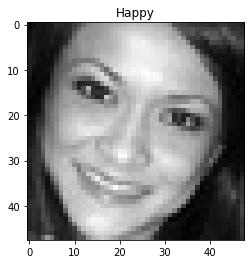

True: Happy


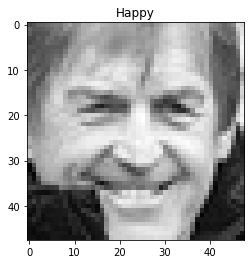

True: Sad


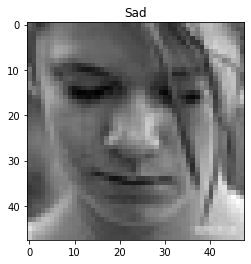

True: Surprise


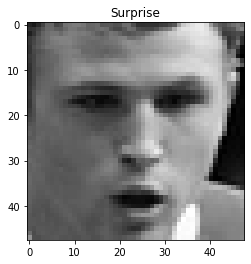

True: Surprise


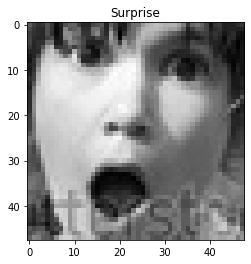

True: Neutral


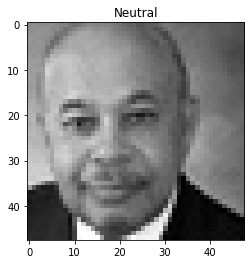

True: Happy


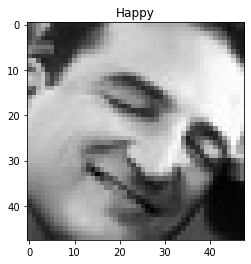

True: Happy


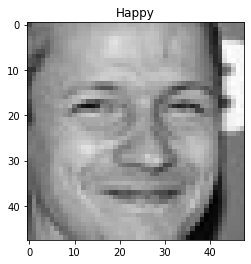

True: Angry


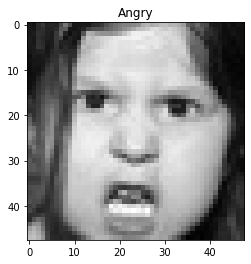

True: Happy


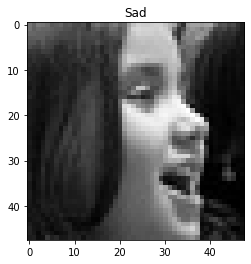

In [14]:
#Predict time!

img, label = test_generator.next()
predictions = model.predict(img)
predictions = np.argmax(predictions, axis=1)
print(predictions.shape)
test_lbl = np.argmax(label, axis=1)
for i in range(10):
    imagea = img[i]
    true_labl = labels[test_lbl[i]]
    plt.imshow(imagea, cmap='gray')
    plt.title(labels[predictions[i]])
    print(f'True: {true_labl}')
    plt.show()


In [19]:
model.save('thirty-ep-5894per', save_format='tf')


INFO:tensorflow:Assets written to: thirty-ep-5894per\assets


INFO:tensorflow:Assets written to: thirty-ep-5894per\assets


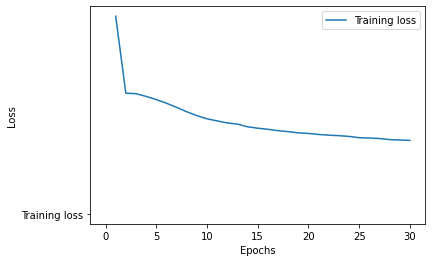

In [15]:
loss = hist.history['loss']
# = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs,loss,label='Training loss')
#.plot(epochs, val_loss,'r',label='Validation loss')
plt.plot('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
test_loss, test_acc, lrate = model.evaluate(test_generator, verbose=1) 

print('Test accuracy:', test_acc)

225/225 [==============================] - 92s 408ms/step - loss: 1.0779 - accuracy: 0.5939 - lr: 2.6214e-04
Test accuracy: 0.5938979983329773
